In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename, y_check = "input_test.txt", 10
#filename, y_check = "input.txt", 2000000 #Fails if trying to use meshgrids

In [3]:
with open(filename) as f:
    lines = f.read().split('\n')
    lines = [l0.strip() for l0 in lines]

In [4]:
#lines

In [5]:
def get_manhattan_distance(p, q):
    """ 
    Return the manhattan distance between points p and q
    assuming both to have the same number of dimensions
    """
    # sum of absolute difference between coordinates
    distance = 0
    for p_i,q_i in zip(p,q):
        distance += abs(p_i - q_i)
    
    return distance

In [6]:
sensors_beacons = []
import re
for line0 in lines:
    if len(line0)>0:
        sensorestr, beaconstr = line0.split(':')

        sensor_x, sensor_y = sensorestr.split(',')
        print(f"sensor_x:{sensor_x}, sensr_y:{sensor_y}")

        sensor_x0 = int(sensor_x[sensor_x.find('x=')+2 : ])
        sensor_y0 = int(sensor_y[sensor_y.find('y=')+2 : ])

        beacon_x , beacon_y = beaconstr.split(',')
        print(f"sensor_x:{sensor_x}, sensr_y:{sensor_y}")
        beacon_x0 = int(beacon_x[beacon_x.find('x=')+2 : ])
        beacon_y0 = int(beacon_y[beacon_y.find('y=')+2 : ])

        s = (sensor_x0, sensor_y0)
        b = (beacon_x0, beacon_y0)

        d = get_manhattan_distance(s,b)
        sensors_beacons.append( ( s , b, d ) )

sensor_x:Sensor at x=2, sensr_y: y=18
sensor_x:Sensor at x=2, sensr_y: y=18
sensor_x:Sensor at x=9, sensr_y: y=16
sensor_x:Sensor at x=9, sensr_y: y=16
sensor_x:Sensor at x=13, sensr_y: y=2
sensor_x:Sensor at x=13, sensr_y: y=2
sensor_x:Sensor at x=12, sensr_y: y=14
sensor_x:Sensor at x=12, sensr_y: y=14
sensor_x:Sensor at x=10, sensr_y: y=20
sensor_x:Sensor at x=10, sensr_y: y=20
sensor_x:Sensor at x=14, sensr_y: y=17
sensor_x:Sensor at x=14, sensr_y: y=17
sensor_x:Sensor at x=8, sensr_y: y=7
sensor_x:Sensor at x=8, sensr_y: y=7
sensor_x:Sensor at x=2, sensr_y: y=0
sensor_x:Sensor at x=2, sensr_y: y=0
sensor_x:Sensor at x=0, sensr_y: y=11
sensor_x:Sensor at x=0, sensr_y: y=11
sensor_x:Sensor at x=20, sensr_y: y=14
sensor_x:Sensor at x=20, sensr_y: y=14
sensor_x:Sensor at x=17, sensr_y: y=20
sensor_x:Sensor at x=17, sensr_y: y=20
sensor_x:Sensor at x=16, sensr_y: y=7
sensor_x:Sensor at x=16, sensr_y: y=7
sensor_x:Sensor at x=14, sensr_y: y=3
sensor_x:Sensor at x=14, sensr_y: y=3
sensor

In [7]:
sensors_beacons

[((2, 18), (-2, 15), 7),
 ((9, 16), (10, 16), 1),
 ((13, 2), (15, 3), 3),
 ((12, 14), (10, 16), 4),
 ((10, 20), (10, 16), 4),
 ((14, 17), (10, 16), 5),
 ((8, 7), (2, 10), 9),
 ((2, 0), (2, 10), 10),
 ((0, 11), (2, 10), 3),
 ((20, 14), (25, 17), 8),
 ((17, 20), (21, 22), 6),
 ((16, 7), (15, 3), 5),
 ((14, 3), (15, 3), 1),
 ((20, 1), (15, 3), 7)]

In [8]:
#Get minimums and maximums, both on sensors and considering beacons distances to calculate maximums
xmin, xmax, ymin, ymax = 0,0,0,0
for i, sbd in enumerate(sensors_beacons):
    s, b, d = sbd
    sx, sy = s
    bx,by = b

    x0 = sx-d
    x1 = sx+d
    y0 = sy-d
    y1 = sy+d

    if i==0:
        xmin = x0
        xmax = x1
        ymin = y0
        ymax = y1
    else:
        xmin = min(x0,xmin)
        xmax = max(x1,xmax)
        ymin = min(y0,ymin)
        ymax = max(y1,ymax)

xmin, xmax, ymin, ymax

(-8, 28, -10, 26)

# Generate area based in instructions

Remember to reference points using xmin and ymin

In [9]:
x_values = np.arange(xmin,xmax+1)
y_values = np.arange(ymin,ymax+1)

In [10]:
x_mg, y_mg = np.meshgrid(x_values, y_values)

In [11]:
y_mg

array([[-10, -10, -10, ..., -10, -10, -10],
       [ -9,  -9,  -9, ...,  -9,  -9,  -9],
       [ -8,  -8,  -8, ...,  -8,  -8,  -8],
       ...,
       [ 24,  24,  24, ...,  24,  24,  24],
       [ 25,  25,  25, ...,  25,  25,  25],
       [ 26,  26,  26, ...,  26,  26,  26]])

In [12]:
x_mg

array([[-8, -7, -6, ..., 26, 27, 28],
       [-8, -7, -6, ..., 26, 27, 28],
       [-8, -7, -6, ..., 26, 27, 28],
       ...,
       [-8, -7, -6, ..., 26, 27, 28],
       [-8, -7, -6, ..., 26, 27, 28],
       [-8, -7, -6, ..., 26, 27, 28]])

In [13]:
SENSOR=1
BEACON=2
COVERED=3

In [14]:
#sensors_beacons[0]

In [15]:
#Test
#np.logical_and( y_mg==18,  x_mg==2)

In [16]:
def manh_dist_np(y_np, x_np, y0, x0):
    dist = np.abs(x_np-x0)+np.abs(y_np-y0)
    return dist

In [17]:
#test
#test0= manh_dist_np(y_mg,x_mg, 16,2)
#test0

In [18]:
#plt.pcolormesh(x_mg,y_mg, test0)

In [19]:
area_coverage = np.zeros_like(y_mg)
for sbd in sensors_beacons:
    s, b,d = sbd
    
    sx, sy = s
    bx,by = b

    #Cover with sensors
    d_to_sensor = manh_dist_np(y_mg,x_mg, sy,sx)
    area_coverage = np.where( d_to_sensor<=d, COVERED, area_coverage)


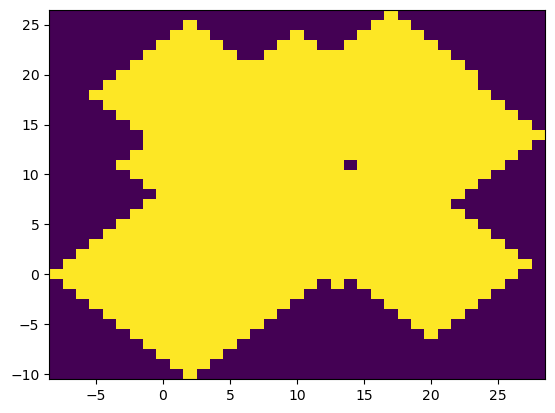

In [20]:
plt.pcolormesh(x_mg,y_mg, area_coverage)

In [21]:
area = np.array(area_coverage)
for sbd in sensors_beacons:
    s, b,d = sbd
    
    sx, sy = s
    bx,by = b
    #print(f" sx,sy= {sx},{sy}  , bx,by= {bx},{by}")
    #area +=  np.logical_and( y_mg==sy,  x_mg==sx) * SENSOR
    area = np.where( np.logical_and( y_mg==sy,  x_mg==sx), SENSOR, area)

    #area += np.logical_and( y_mg==by,  x_mg==bx) * BEACON
    area = np.where( np.logical_and( y_mg==by,  x_mg==bx), BEACON, area)


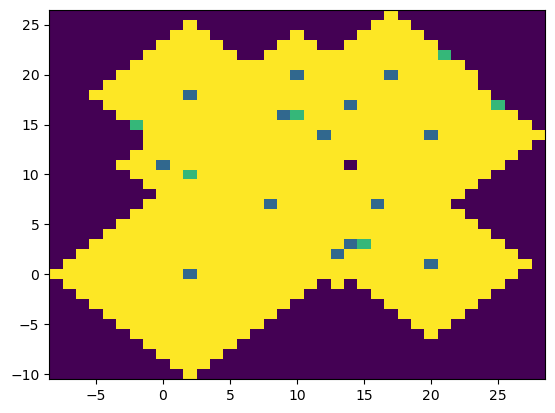

In [22]:
plt.pcolormesh(x_mg,y_mg, area)

In [23]:
non_valid_beacon_locations = np.logical_and(area==COVERED, area!=BEACON)

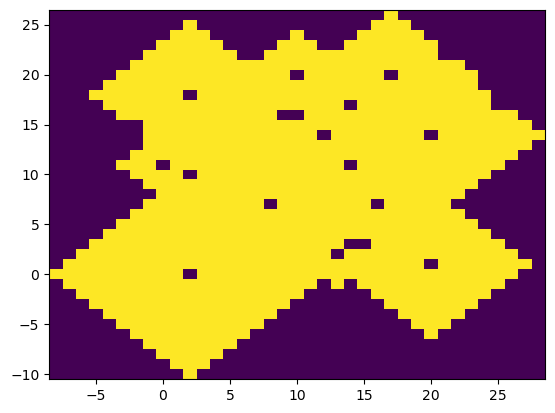

In [24]:
plt.pcolormesh(x_mg,y_mg, non_valid_beacon_locations)

In [25]:
#plt.pcolormesh(x_mg,y_mg, np.logical_and( y_mg==y_check , non_valid_beacon_locations ))

In [26]:
np.sum( np.logical_and( y_mg==y_check , non_valid_beacon_locations ))

26

OK